In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm


# Filter out FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Filter out FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('../unseen_species_model/results/estimations.csv')
df = df[df['decade']<=1800]
df = df.rename(columns = {'decade':'year', 'region':'region_name'})


print(list(set(df.region_name)))

['Spain', 'Portugal', 'Balkans', 'France', 'Italy', 'United Kingdom', 'Nordic countries', 'Arabic world', 'Central Europe', 'Chinese world', 'Slav world', 'Low countries', 'Indian world', 'Korea', 'Eastern Europe', 'Latin World', 'Japan', 'Persian world', 'German world', 'Greek World']


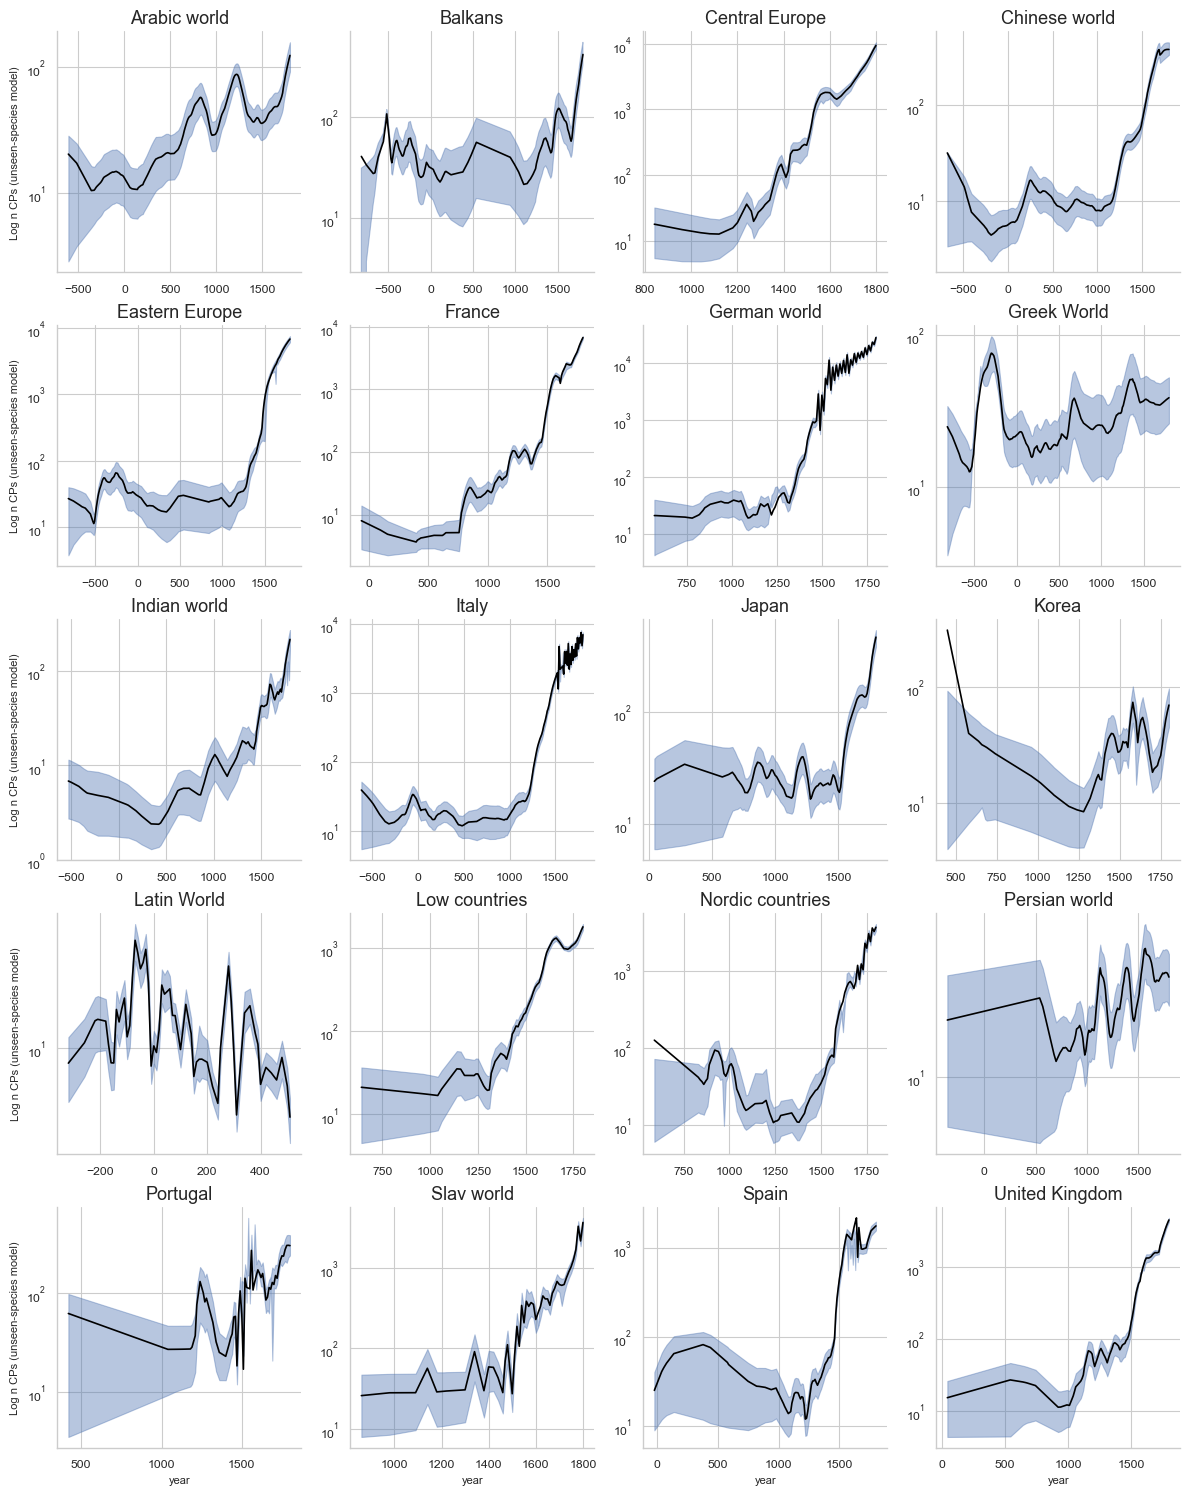

In [2]:


# Custom function for plotting
def lowess_fill_plot(x, y, lower, upper, color, **kwargs):
    ax = plt.gca()  # Get current axis
    ax.set_yscale('log')

    # LOWESS regression
    lowess_results = sm.nonparametric.lowess(y, x, frac=lowess_span)
    ax.plot(x, lowess_results[:, 1], color='black', label='LOWESS')

    # Calculating LOWESS for lower and upper bounds
    lowess_lower = sm.nonparametric.lowess(lower, x, frac=lowess_span)
    lowess_upper = sm.nonparametric.lowess(upper, x, frac=lowess_span)

    # Filling between lower and upper LOWESS bounds
    ax.fill_between(x, lowess_lower[:, 1], lowess_upper[:, 1], alpha=0.4, color=color)

    ax.legend()


sns.set(style="whitegrid", context="paper", rc={"font.size": 10, "axes.titlesize": 10, "axes.labelsize": 8})

# Adjust the lowess_span as per your requirement
lowess_span = 0.1

# Create a facet plot with one plot per region
g = sns.FacetGrid(df, col="region_name", col_wrap=4, height=3, sharex=False, sharey=False)

# Use the custom function for plotting
g = g.map(lowess_fill_plot, "year", "N_est", "lower", "upper", color='b')

# Find the global minimum and maximum year
global_min_year = df["year"].min()
global_max_year = df["year"].max()

"""# Adjust the x-axis scale for each plot
for ax in g.axes:
    ax.set_xlim(global_min_year, global_max_year)"""

# Set titles and y-labels
g.set_titles("{col_name}", size=13)
g.set_ylabels("Log n CPs (unseen-species model)")

plt.savefig("figures/unseen_species_model/facet_plot_regions.png", dpi=300)
# Show the plot
plt.show()


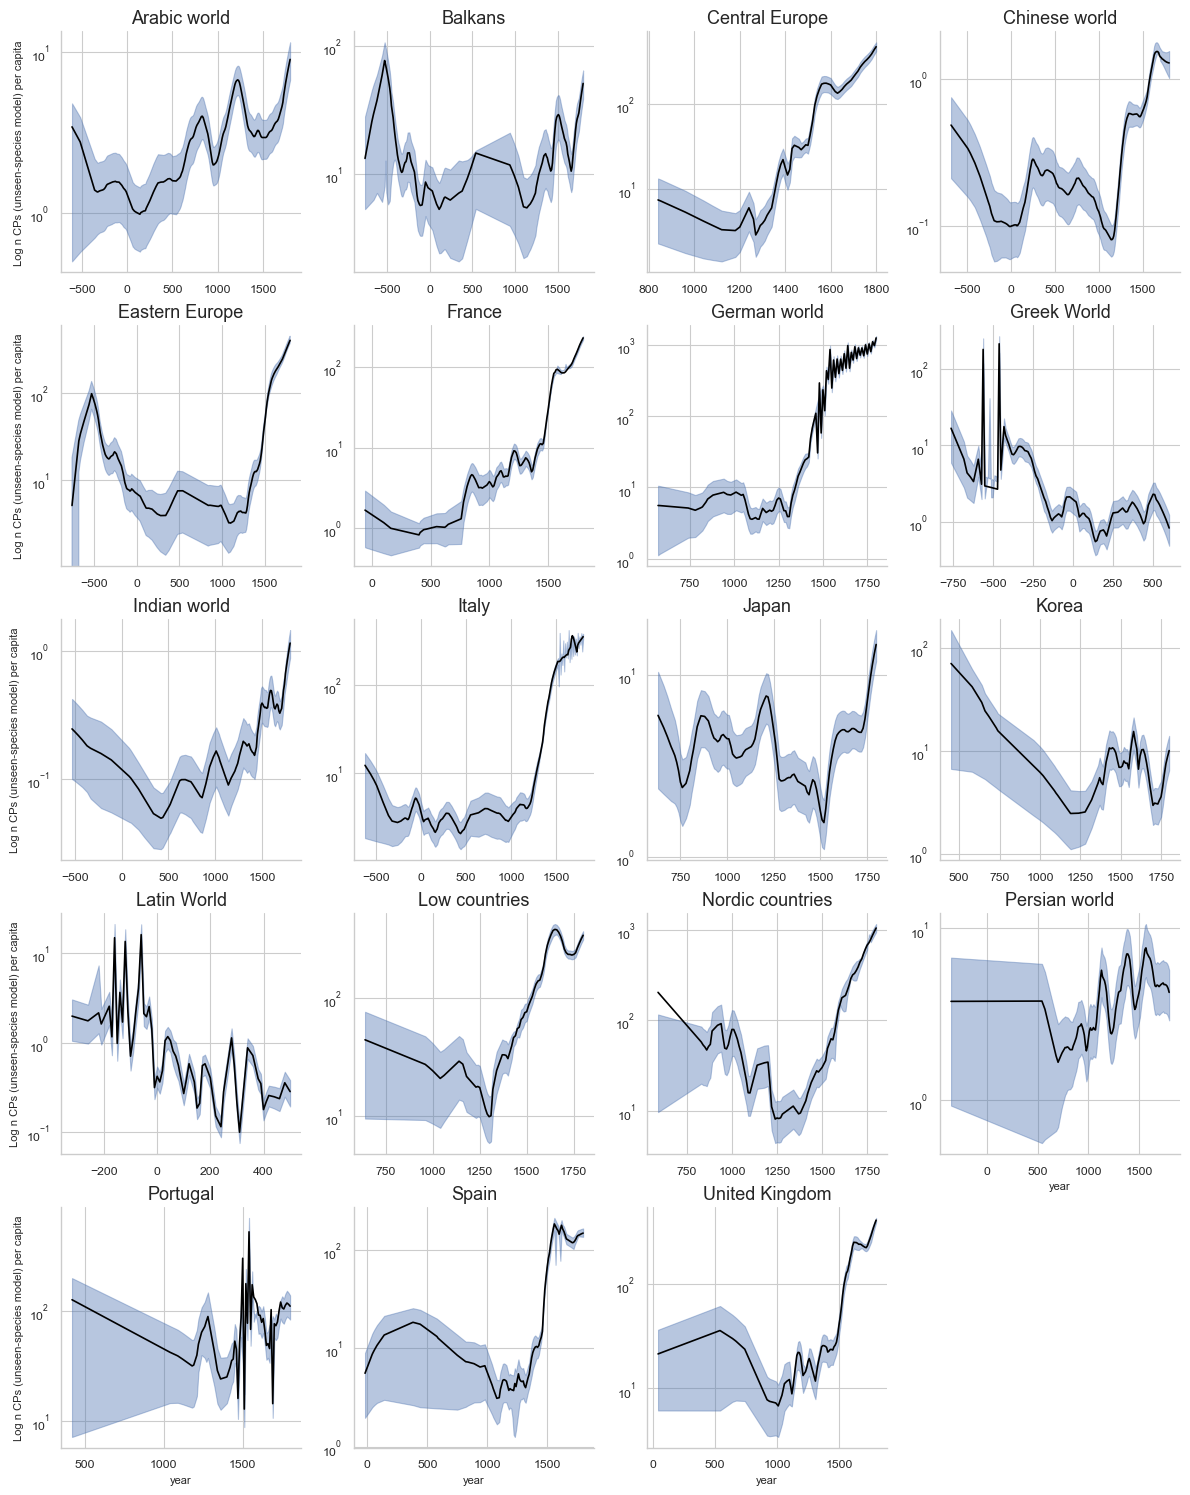

In [3]:
df_population = pd.read_csv('../environnement_data/population_region_name.csv', index_col=[0])
df_merged = pd.merge(df_population, df, on = ['year', 'region_name'])
df_merged['N_est'] = df_merged['N_est']/df_merged['population']
df_merged['lower'] = df_merged['lower']/df_merged['population']
df_merged['upper'] = df_merged['upper']/df_merged['population']

sns.set(style="whitegrid", context="paper", rc={"font.size": 10, "axes.titlesize": 10, "axes.labelsize": 8})

# Adjust the lowess_span as per your requirement
lowess_span = 0.1

# Create a facet plot with one plot per region
g = sns.FacetGrid(df_merged, col="region_name", col_wrap=4, height=3, sharex=False, sharey=False)

# Use the custom function for plotting
g = g.map(lowess_fill_plot, "year", "N_est", "lower", "upper", color='b')

# Find the global minimum and maximum year
global_min_year = df_merged["year"].min()
global_max_year = df_merged["year"].max()

"""# Adjust the x-axis scale for each plot
for ax in g.axes:
    ax.set_xlim(global_min_year, global_max_year)"""

# Set titles and y-labels
g.set_titles("{col_name}", size=13)
g.set_ylabels("Log n CPs (unseen-species model) per capita")

plt.savefig("figures/unseen_species_model/facet_plot_regions_per_capita.png", dpi=300)


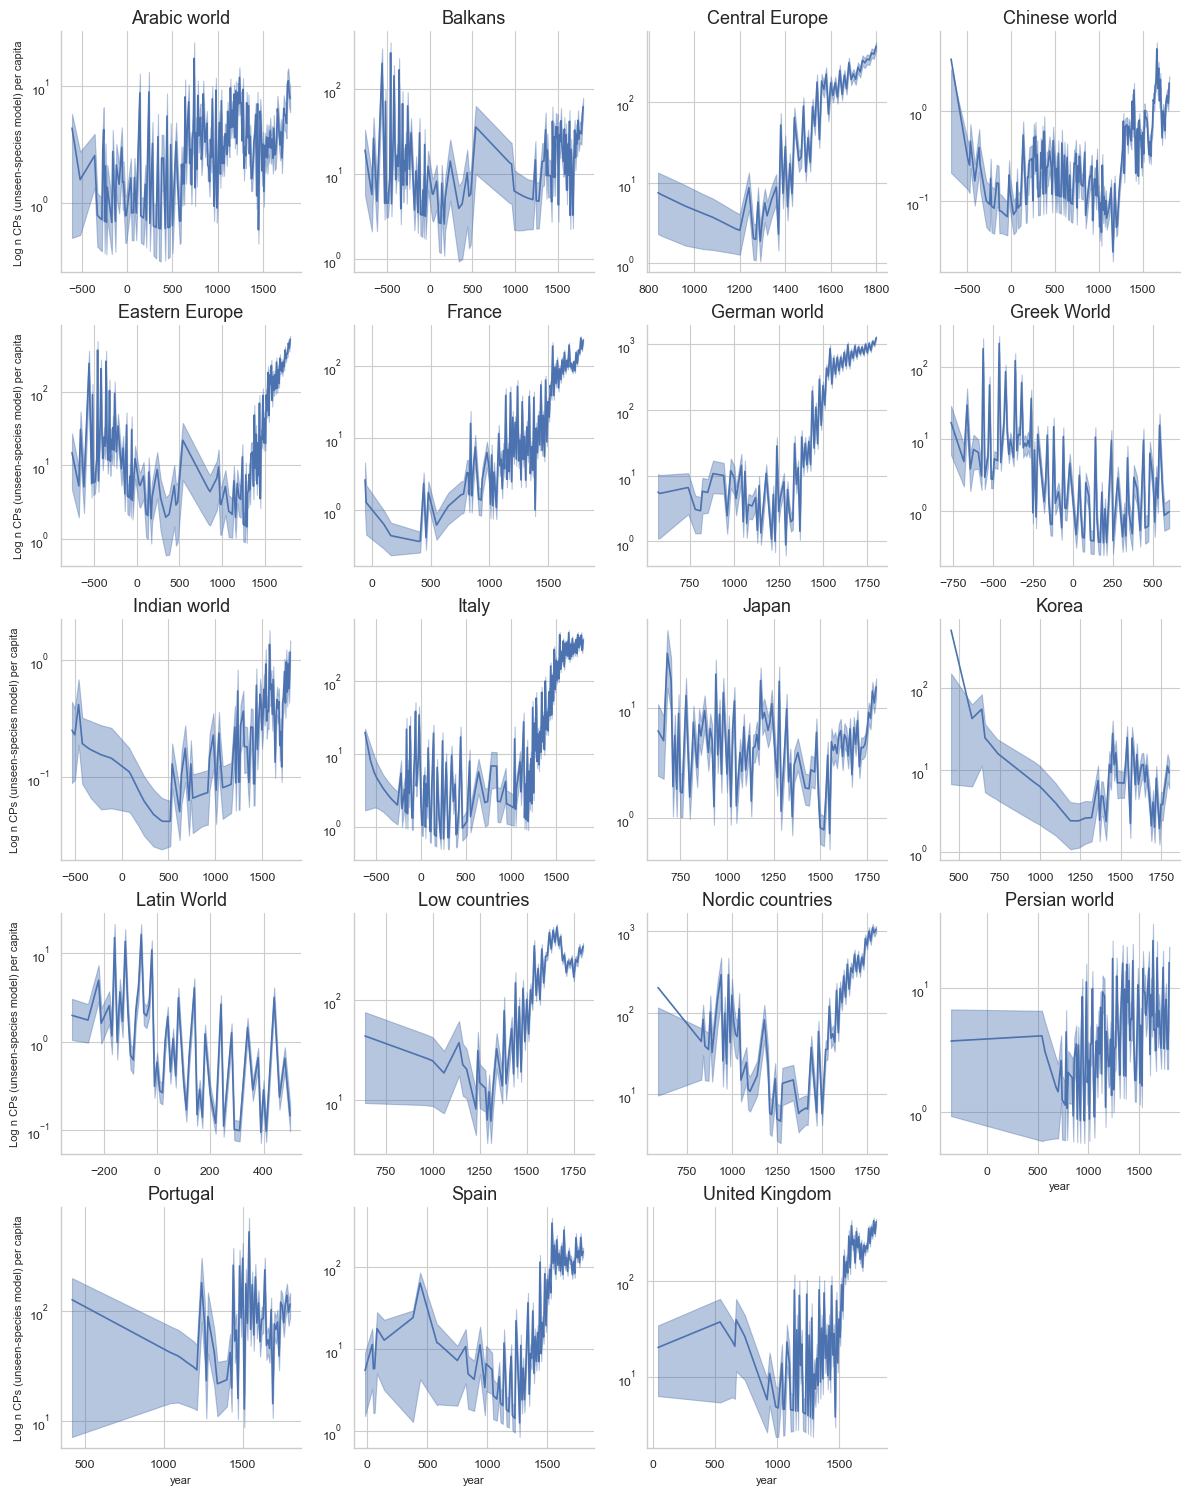

In [4]:

# Custom function for plotting with filling between lower and upper bounds
def fill_plot(x, y, lower, upper, color, **kwargs):
    ax = plt.gca()  # Get current axis
    ax.set_yscale('log') # 10 base

    # Plot the original line
    ax.plot(x, y, color=color, label='Line')

    # Filling between lower and upper bounds
    ax.fill_between(x, lower, upper, alpha=0.4, color=color)

    ax.legend()

sns.set(style="whitegrid", context="paper", rc={"font.size": 10, "axes.titlesize": 10, "axes.labelsize": 8})

# Adjust the lowess_span as per your requirement

# Create a facet plot with one plot per region
g = sns.FacetGrid(df_merged, col="region_name", col_wrap=4, height=3, sharex=False, sharey=False)

# Use the custom function for plotting
#g = g.map(lowess_fill_plot, "year", "N_est", "lower", "upper", color='b')

g = g.map(fill_plot, "year", "N_est", "lower", "upper", color='b')

# Find the global minimum and maximum year
global_min_year = df_merged["year"].min()
global_max_year = df_merged["year"].max()

"""# Adjust the x-axis scale for each plot
for ax in g.axes:
    ax.set_xlim(global_min_year, global_max_year)"""

# Set titles and y-labels
g.set_titles("{col_name}", size=13)
g.set_ylabels("Log n CPs (unseen-species model) per capita")

plt.savefig("figures/unseen_species_model/facet_plot_regions_per_capita_non_lowess.png", dpi=300)

